# Proyek Analisis Data: order_payments_dataset dan sellers_dataset
- **Nama:** Adi Purnama
- **Email:** adipurnamaa8@gmail.com
- **ID Dicoding:** adi_purnama8

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
- Negara bagian mana yang memiliki jumlah penjual terbanyak dan tersedikit ?

## Import Semua Packages/Library yang Digunakan

In [9]:
# Import library utama untuk analisis data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")


## Data Wrangling

### Gathering Data

In [11]:
# Load dataset transaksi pembayaran
df_payment = pd.read_csv('/content/order_payments_dataset.csv')

# Load dataset informasi penjual
df_sellers = pd.read_csv('/content/sellers_dataset.csv')

# Menampilkan 5 data pertama dari masing-masing dataset
df_payment.head(), df_sellers.head()


(                           order_id  payment_sequential payment_type  \
 0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
 1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
 2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
 3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
 4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
 
    payment_installments  payment_value  
 0                     8          99.33  
 1                     1          24.39  
 2                     1          65.71  
 3                     8         107.78  
 4                     2         128.45  ,
                           seller_id  seller_zip_code_prefix  \
 0  3442f8959a84dea7ee197c632cb2df15                   13023   
 1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3  c0f3eea2e14555b6faeea3dd58c1b1c3               

**Insight:**
- Dataset transaksi pembayaran dan informasi penjual telah berhasil dimuat.
- Data ini akan digunakan untuk menjawab pertanyaan bisnis terkait metode pembayaran dan jumlah penjual di setiap negara bagian.

### Assessing Data

In [19]:
# Melihat informasi umum dataset
print(df_payment.info())
print(df_sellers.info())

# Mengecek missing values
print("Missing values di df_payment:\n", df_payment.isna().sum())
print("\nMissing values di df_sellers:\n", df_sellers.isna().sum())

# Mengecek duplikasi data
print("\nJumlah data duplikat di df_payment:", df_payment.duplicated().sum())
print("Jumlah data duplikat di df_sellers:", df_sellers.duplicated().sum())

# Mengecek nilai unik dari kolom penting
print("\nMetode pembayaran unik:", df_payment['payment_type'].unique())
print("Negara bagian unik:", df_sellers['seller_state'].unique())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage:

**Insight:**
1. Kualitas Data

- Tidak ada missing values dan data duplikat, data sudah bersih.

2. Metode Pembayaran

- Terdapat 5 metode: credit_card, boleto, voucher, debit_card, not_defined.
3. distribusi penjual

- Penjual tersebar di berbagai negara bagian, mayoritas di SP, RJ, PE, PR, dll.

### Cleaning Data

In [20]:
# Menghapus baris yang memiliki missing values
df_payment_clean = df_payment.dropna()
df_sellers_clean = df_sellers.dropna()

# Menghapus data duplikat
df_payment_clean = df_payment_clean.drop_duplicates()
df_sellers_clean = df_sellers_clean.drop_duplicates()


**Insight:**
- tidak ada miising value
-tidak ada data duplikat


## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
# Metode pembayaran paling sering digunakan
payment_counts = df_payment_clean['payment_type'].value_counts()
print("Metode pembayaran paling sering digunakan:\n", payment_counts)


Metode pembayaran paling sering digunakan:
 payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


**Insight:**
1. Metode Pembayaran Paling Populer

- Credit card (76.795 transaksi) menjadi metode pembayaran paling dominan.
- Boleto (19.784 transaksi) adalah metode alternatif utama.
- Voucher dan debit card jauh lebih jarang digunakan.
- Metode "not_defined" hanya muncul 3 kali, bisa jadi error atau transaksi spesial.

In [33]:
# Negara bagian dengan jumlah penjual terbanyak dan tersedikit
sellers_per_state = df_sellers_clean['seller_state'].value_counts()
print("\nNegara bagian dengan jumlah penjual terbanyak:\n", sellers_per_state.head(1))
print("\nNegara bagian dengan jumlah penjual tersedikit:\n", sellers_per_state.tail(1))



Negara bagian dengan jumlah penjual terbanyak:
 seller_state
SP    1849
Name: count, dtype: int64

Negara bagian dengan jumlah penjual tersedikit:
 seller_state
PA    1
Name: count, dtype: int64


**Insight:**

1. Distribusi Penjual per Negara Bagian

- SP (São Paulo) memiliki jumlah penjual terbanyak (1.849 penjual).
- PA (Pará) hanya memiliki 1 penjual, menunjukkan potensi ekspansi di wilayah ini.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-35-755ae6776d89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Blues")


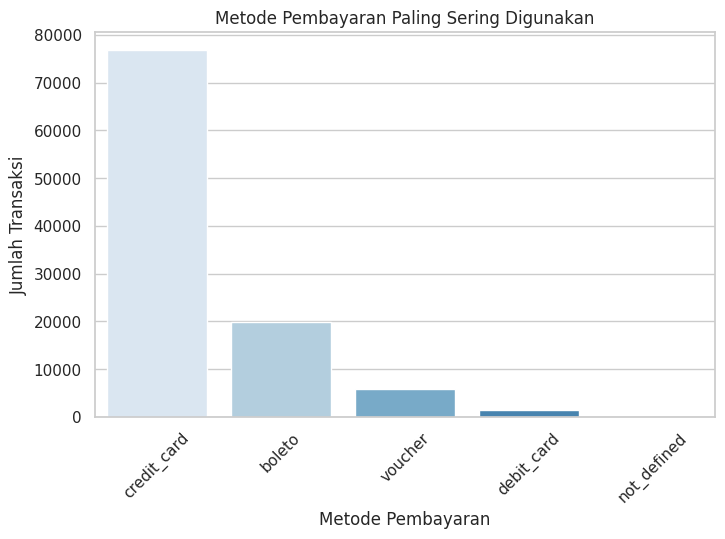

In [35]:
# Visualisasi metode pembayaran
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Blues")
plt.title("Metode Pembayaran Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()


**Insight:**
1. Credit Card Mendominasi

- Metode credit card paling banyak digunakan dengan hampir 80.000 transaksi, menunjukkan mayoritas pelanggan lebih memilih pembayaran instan dan praktis.

2. Boleto Sebagai Alternatif Utama
- Boleto (hampir 20.000 transaksi) menjadi metode pembayaran kedua terbanyak, yang mungkin menunjukkan preferensi pengguna tanpa akses ke kartu kredit atau yang lebih nyaman dengan pembayaran offline.

3. Voucher dan Debit Card Kurang Populer
- Penggunaan voucher dan debit card jauh lebih sedikit, menunjukkan bahwa metode ini kurang diminati atau kurang mendapat promosi yang cukup.
4. Metode ‘Not Defined’
- Jumlah transaksi yang tidak terdefinisi sangat kecil, tetapi tetap perlu dipantau untuk memastikan data tidak bermasalah.

### Pertanyaan 2:

<ipython-input-36-e4cb32a9baf6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sellers_per_state.index, y=sellers_per_state.values, palette="Greens")


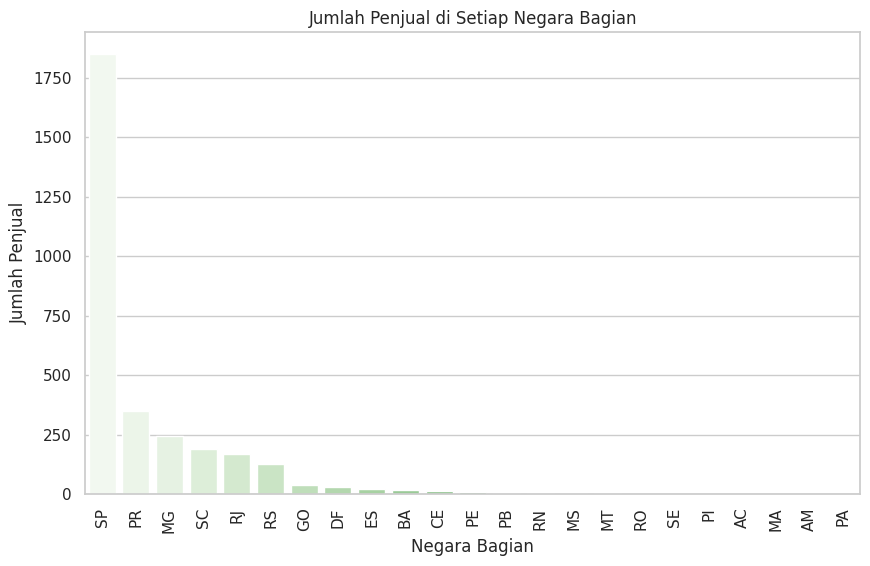

In [36]:
# Visualisasi jumlah penjual per negara bagian
plt.figure(figsize=(10,6))
sns.barplot(x=sellers_per_state.index, y=sellers_per_state.values, palette="Greens")
plt.title("Jumlah Penjual di Setiap Negara Bagian")
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Penjual")
plt.xticks(rotation=90)
plt.show()

**Insight:**

1. SP (São Paulo) Mendominasi
- Hampir 1.800 penjual, jauh melampaui negara bagian lain. Ini menunjukkan SP sebagai pusat perdagangan utama.

2. Negara Bagian Lain Tertinggal
- PR, MG, SC, RJ berada di posisi berikutnya, tetapi jumlahnya jauh lebih kecil.

3. Wilayah dengan Penjual Minim
- PA, AM, MA, PI hampir tidak memiliki penjual, mungkin karena faktor ekonomi atau geografis.

## Analisis Lanjutan (Opsional)

## Conclusion

**1. Metode Pembayaran Paling Populer**
- Credit Card Mendominasi – Dengan 76.795 transaksi, kartu kredit menjadi metode pembayaran utama, menunjukkan preferensi pelanggan terhadap pembayaran cepat dan instan.
- Boleto sebagai Alternatif – Sebanyak 19.784 transaksi menggunakan boleto, mengindikasikan adanya segmen pelanggan yang lebih nyaman dengan pembayaran offline atau tidak memiliki akses ke kartu kredit.
- Voucher dan Debit Card Kurang Diminati – Penggunaan metode ini jauh lebih rendah, menunjukkan kurangnya daya tarik atau promosi.
- "Not Defined" (3 Transaksi) – Perlu dievaluasi lebih lanjut, apakah ini merupakan kesalahan pencatatan atau transaksi spesial.

**2. Distribusi Penjual per Negara Bagian**
- São Paulo (SP) sebagai Pusat Penjualan – Dengan 1.849 penjual, SP menjadi negara bagian dengan aktivitas perdagangan tertinggi. Ini menegaskan posisinya sebagai pusat ekonomi utama di Brasil.
- Negara Bagian dengan Sedikit Penjual – PA (Pará) hanya memiliki 1 penjual, menunjukkan potensi ekspansi bisnis di wilayah ini.
- Ketimpangan Distribusi – Beberapa negara bagian seperti PR, MG, SC, dan RJ memiliki jumlah penjual yang cukup signifikan, tetapi masih tertinggal jauh dari SP. Sementara itu, wilayah seperti PA, AM, MA, dan PI hampir tidak memiliki penjual. Faktor geografis dan ekonomi mungkin menjadi penghambat.

**3. Implikasi Bisnis & Rekomendasi**
- Strategi Pembayaran – Optimalkan metode credit card karena paling populer, namun tingkatkan edukasi dan promosi untuk metode alternatif seperti boleto dll.
- Ekspansi Geografis – Fokus pada negara bagian dengan jumlah penjual rendah (PA, AM, MA, PI) sebagai target ekspansi, misalnya dengan meningkatkan dukungan infrastruktur logistik dan pemasaran.
- Investigasi Data "Not Defined" – Pastikan tidak ada masalah teknis atau kesalahan pencatatan yang dapat mengganggu analisis data transaksi.